
<h1 style="color: green; border: 2px solid green; padding: 10px; display: inline-block;">AI Based Medical Diagnosis For Spinal Scoliosis </h1>


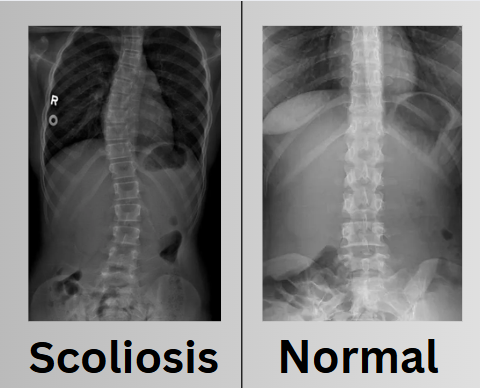

Scoliosis is a medical condition characterized by abnormal lateral curvature of the spine, affecting millions of people throughout the world. Early detection of scoliosis is important for good treatment and management. Conventional detection approaches are mostly based on manual observation of X-ray images, which in itself is laborious and prone to human error. The present project is concerned with the development of an AI system for automatic detection of scoliosis based on deep learning algorithms. 

A Convolutional Neural Network (CNN) classifies spine X-ray images into three different categories: Normal, Scoliosis, and Spondylosis. The model learns from a database of spine X-ray images with a test set accuracy of 90%. The system also utilizes Grad-CAM (gradient-weighted Class Activation Mapping) to provide visual explanations of the model's predictions and align them with human-level interpretation.

The project is a demonstration of AI working in medical imaging and aims to provide an early detection of scoliosis in a scalable manner. In the future, the aim is to enlarge the dataset, increase the accuracy of the model, and incorporate the system into clinical workflows.

<h1>Explanation<h1>

<h3>1. Importing The Necessary Libraries</h3>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
import cv2

<h3>2. Setting Image Parameters</h3>

In [2]:
# Image settings
path = r'C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\ImagesOriginalSize'
im_width = 250
im_length = 950
IMAGE_SIZE = (im_width, im_length)
classes = [0, 1, 2]  # 0: Normal, 1: Scoliosis, 2: Spondylosis

<h3>3. Defining Paths</h3>

In [6]:
# Define paths
normal_path = os.path.join(path, 'NormalFinal')
scoliosis_path = os.path.join(path, 'ScolFinal')
spondylosis_path = os.path.join(path, 'SpondFinal')

<h3>4. Counting Images in Each Category</h3>

In [ ]:
def count_images(folder):
    image_counts = {}  

    for root, _, files in os.walk(folder):
        folder_name = os.path.basename(root)  
        image_counts[folder_name] = len(files)

    for folder_name, count in image_counts.items():
        print(f"{folder_name} = {count}")
# folder_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\ImagesOriginalSize"
# count_images(folder_path)

In [21]:
# Count images of traing data
normal_count = count_images(normal_path)
scoliosis_count = count_images(scoliosis_path)
spondylosis_count = count_images(spondylosis_path)

NormalFinal = 71
ScolFinal = 188
SpondFinal = 79


<h3>5. Splitting Data into Training and Testing Sets</h3>

In [26]:
normal_count = 71
scoliosis_count = 188 
spondylosis_count = 79

# Splitting data (80% train, 20% test)
train_split_normal = math.ceil(normal_count * 0.8)
train_split_scol = math.ceil(scoliosis_count * 0.8)
train_split_spon = math.ceil(spondylosis_count * 0.8)

<h3>6. Loading and Preprocessing Images</h3>

In [ ]:
# Function to load images
def get_data(folder, start, end, label):
    file_names = sorted(os.listdir(folder))
    images = []
    labels = []
    for idx in range(start, end):
        file_path = os.path.join(folder, file_names[idx])
        try:
            im = tf.io.read_file(file_path)
            im = tf.image.decode_image(im, channels=1)
            im = tf.image.resize(im, IMAGE_SIZE, method='lanczos5')
            im_array = im.numpy() / 255.0  # Normalize pixel values to [0,1]
            images.append(im_array)
            labels.append(classes[label])
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")
    return np.array(images), np.array(labels)

In [ ]:
x_norm_train, y_norm_train = get_data(normal_path, 0, train_split_normal, 0)
x_scol_train, y_scol_train = get_data(scoliosis_path, 0, train_split_scol, 1)
x_spon_train, y_spon_train = get_data(spondylosis_path, 0, train_split_spon, 2)
x_train = np.vstack((x_norm_train, x_scol_train, x_spon_train))
y_train = np.hstack((y_norm_train, y_scol_train, y_spon_train))

<h3>7. Building the CNN Model</h3>

In [ ]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(im_width, im_length, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Softmax for multi-class classification
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train model with validation split
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save the model
model.save("spine_classification_model.keras")

# Load the model
model = tf.keras.models.load_model("spine_classification_model.keras")


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 337s 49s/step - accuracy: 0.4031 - loss: 7.4499 - val_accuracy: 0.0000e+00 - val_loss: 2.8107
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 232s 29s/step - accuracy: 0.7028 - loss: 0.7724 - val_accuracy: 0.0000e+00 - val_loss: 1.4133
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 510s 72s/step - accuracy: 0.6866 - loss: 0.8107 - val_accuracy: 0.0000e+00 - val_loss: 5.1949
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 218s 31s/step - accuracy: 0.7308 - loss: 0.6225 - val_accuracy: 0.0000e+00 - val_loss: 2.8745
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 306s 46s/step - accuracy: 0.7410 - loss: 0.5365 - val_accuracy: 0.0000e+00 - val_loss: 2.8033
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 330s 52s/step - accuracy: 0.8520 - loss: 0.4564 - val_accuracy: 0.0000e+00 - val_loss: 1.7480
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 201s 29s/step - accuracy: 0.7503 - loss: 0.4562 - val_accuracy: 0.0545 - val_loss: 1.9712
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 317s 49s/step - accuracy: 0.8838 - loss: 0.3278 - val_accu

In [29]:
# Load the model
model = tf.keras.models.load_model("spine_classification_model.keras")

In [30]:
# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f"Training Accuracy: {train_acc:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 661ms/step - accuracy: 0.8987 - loss: 0.3206
Training Accuracy: 0.8125


In [31]:
# Merge data
x_train = np.vstack((x_norm_train, x_scol_train, x_spon_train))
y_train = np.hstack((y_norm_train, y_scol_train, y_spon_train))

<h3>8. Ploting the Graph to check for accuracy </h3>

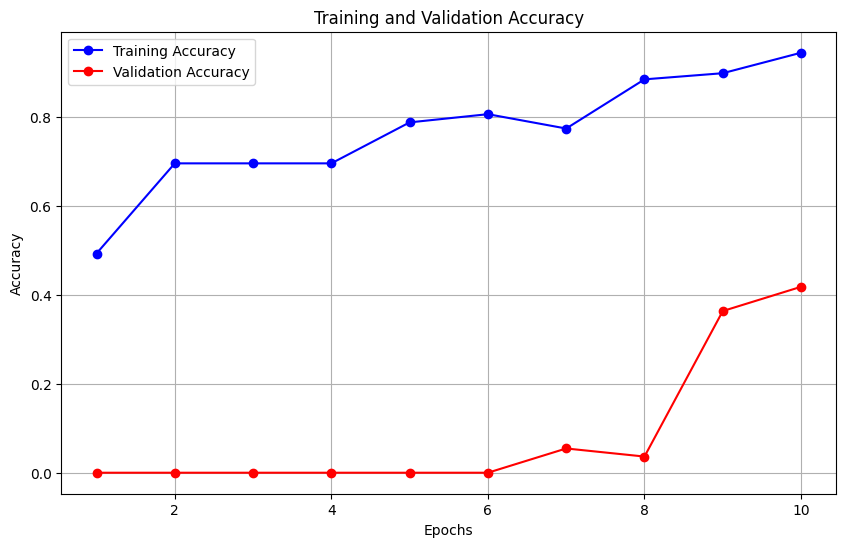

In [ ]:
# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [32]:
# Load the model
model = tf.keras.models.load_model("spine_classification_model.keras")

In [33]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 948, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 474, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 472, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 236, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 234, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 883584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    56,549,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,816,139 (647.80 MB)

 Trainable params: 56,605,379 (215.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,210,760 (431.86 MB)

None


<h3>9. Grad-CAM Visualization</h3>

9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 687ms/step


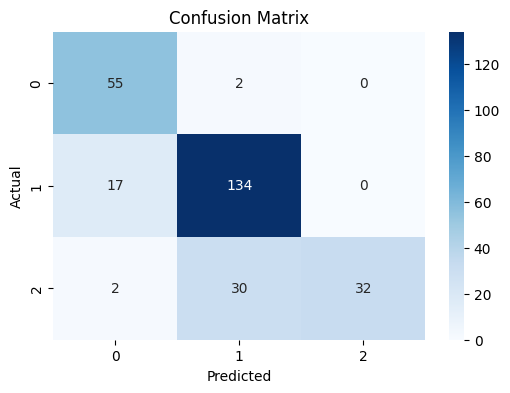

In [34]:
y_pred = model.predict(x_train)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_train, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Preprocess the image
def preprocess_image(img_path):
    """
    Preprocess the image:
    - Resize to (250, 950)
    - Convert to grayscale
    - Normalize pixel values to [0, 1]
    - Add batch and channel dimensions
    """
    img = Image.open(img_path).resize((950, 250))
    img = img.convert("L")  # Convert to grayscale
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = np.expand_dims(img_array, axis=-1)  
    return img_array


<h3>10. Testing the Model</h3>
<h4 style="color:red;">"Normal" confidence > 0.5 <br>
                        "Spondylosis" confidence < 0.2 <br>
                        "Scoliosis" confidence< 0.5 </h4>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


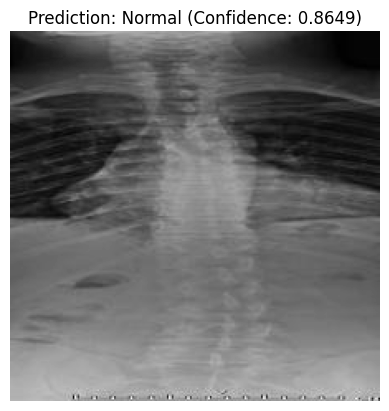

In [ ]:
# Function to Make a Prediction
def predict_scoliosis(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    confidence = prediction[0][0] 
    #result = "Normal" if confidence > 0.5 else "Scoliosis"
    if confidence > 0.5:
        result = "Normal"
    elif confidence < 0.2:
        result = "Spondylosis"
    else:
        result = "Scoliosis"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(f"Prediction: {result} (Confidence: {confidence:.4f})")
    plt.axis("off")
    plt.show()
#Test - 1
# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Normal\N1,N,40,M_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


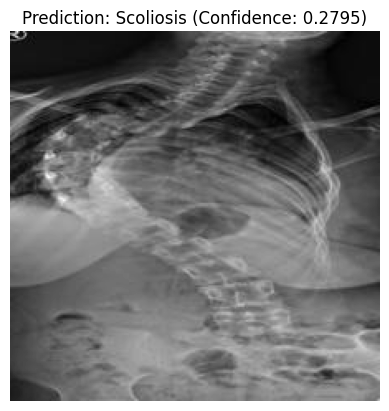

In [41]:
#Test - 2
# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Scol\N5,S,16,F_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


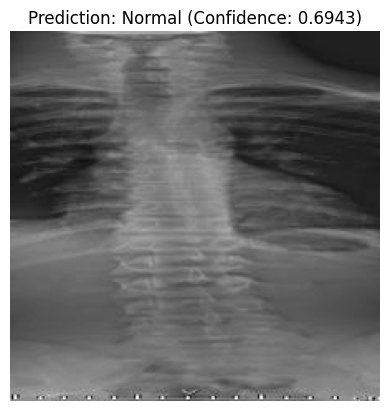

In [42]:
#Test - 3
# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Normal\N2,N,18,M_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


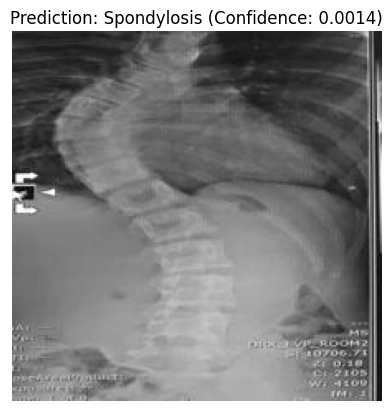

In [45]:
#Test - 4
# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Scol\N10, Rt TAIS, M, 16 yrs.jpg"  # Change this to your image path
predict_scoliosis(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


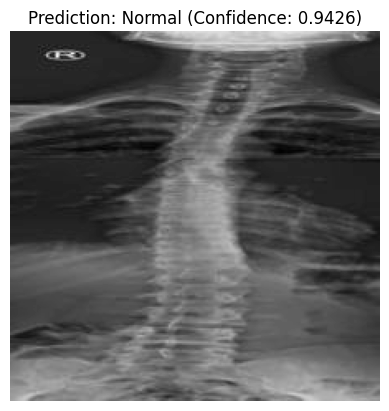

In [44]:
#Test - 5
# Upload an Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\224\224\Normal\N16,N,M,17_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


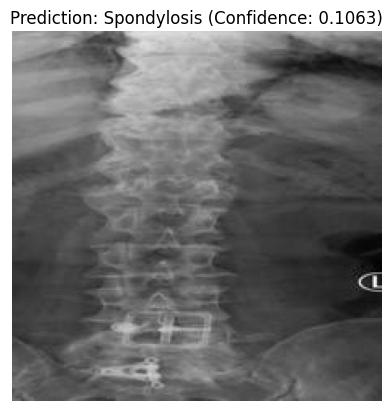

In [ ]:
#Test - 6
# Upload Image and Test the Model
img_path = r"C:\Users\aksha\Downloads\scoliosis-detection-main\scoliosis-detection-main\Spine X-Rays\227\227\Spond\N44,S,54,F_1_0.jpg"  # Change this to your image path
predict_scoliosis(img_path)